<a href="https://colab.research.google.com/github/madhugrover/Thinkful_projects/blob/master/amazon_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
# matplotlib pyplot for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [0]:

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
key = 'GKY9V5THAXIUXZ1N'
ts = TimeSeries(key,output_format='pandas')
ti = TechIndicators(key,output_format='pandas' )
# amzn_data is a pandas dataframe, amzn_meta_data is a dict
amzn, amzn_meta_data = ts.get_daily(symbol='AMZN',outputsize='full' )
amzn_rsi, amzn_rsi_meta_data = ti.get_rsi(symbol='AMZN' )
amzn_macd, amzn_macd_meta_data = ti.get_macd(symbol='AMZN' )
amzn_bbands, amzn_bbands_meta_data = ti.get_bbands(symbol='AMZN' )
# Get the data, returns a tuple
# amzn_sma is a dict, aapl_meta_sma also a dict
amzn_sma = ti.get_sma(symbol='AMZN')

In [0]:
amzn_data = pd.merge(amzn,amzn_rsi, how = 'outer', on = 'date')

In [0]:
amzn_data = pd.merge(amzn_data,amzn_macd, how = 'outer', on = 'date')


In [0]:
amzn_data = pd.merge(amzn_data,amzn_bbands, how = 'outer', on = 'date')


In [0]:
amzn_data.rename(columns = {'1. open':'open','2. high':'high','3. low':'low','4. close':'close','5. volume':'volume','Real Upper Band':'bb_upper','Real Lower Band':'bb_lower','Real Middle Band': 'bb_middle'},inplace = True)
df = amzn_data.sort_values('date')
df

,open,high,low,close,volume,RSI,MACD,MACD_Hist,MACD_Signal,bb_middle,bb_upper,bb_lower
date,,,,,,,,,,,,
2000-03-03,63.25,64.75,62.06,62.50,6059500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-06,62.88,67.25,62.81,63.94,7665800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-07,64.88,65.81,62.13,63.50,4178800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-08,63.25,64.75,60.56,63.63,5940700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-09,63.00,69.00,62.19,68.81,8312500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-27,1934.38,1975.00,1882.76,1884.30,8143993.0,41.0197,17.6430,-31.9403,49.5833,2062.6490,2240.7491,1884.5489
2020-02-28,1814.63,1889.76,1811.13,1883.75,9493797.0,40.9784,4.5453,-36.0304,40.5757,2063.3025,2238.6550,1887.9500
2020-03-02,1906.49,1954.51,1870.00,1953.95,6761651.0,48.0136,-0.1683,-32.5952,32.4269,2060.5640,2240.8811,1880.2469


In [0]:
df.reset_index(inplace=True)
df

,date,open,high,low,close,volume,RSI,MACD,MACD_Hist,MACD_Signal,bb_middle,bb_upper,bb_lower
0,2000-03-03,63.25,64.75,62.06,62.50,6059500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-03-06,62.88,67.25,62.81,63.94,7665800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-07,64.88,65.81,62.13,63.50,4178800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-08,63.25,64.75,60.56,63.63,5940700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-09,63.00,69.00,62.19,68.81,8312500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,2020-02-27,1934.38,1975.00,1882.76,1884.30,8143993.0,41.0197,17.6430,-31.9403,49.5833,2062.6490,2240.7491,1884.5489
5028,2020-02-28,1814.63,1889.76,1811.13,1883.75,9493797.0,40.9784,4.5453,-36.0304,40.5757,2063.3025,2238.6550,1887.9500
5029,2020-03-02,1906.49,1954.51,1870.00,1953.95,6761651.0,48.0136,-0.1683,-32.5952,32.4269,2060.5640,2240.8811,1880.2469
5030,2020-03-03,1975.37,1996.33,1888.09,1908.99,7534491.0,44.4423,-7.4460,-31.8983,24.4523,2055.8035,2246.5472,1865.0598


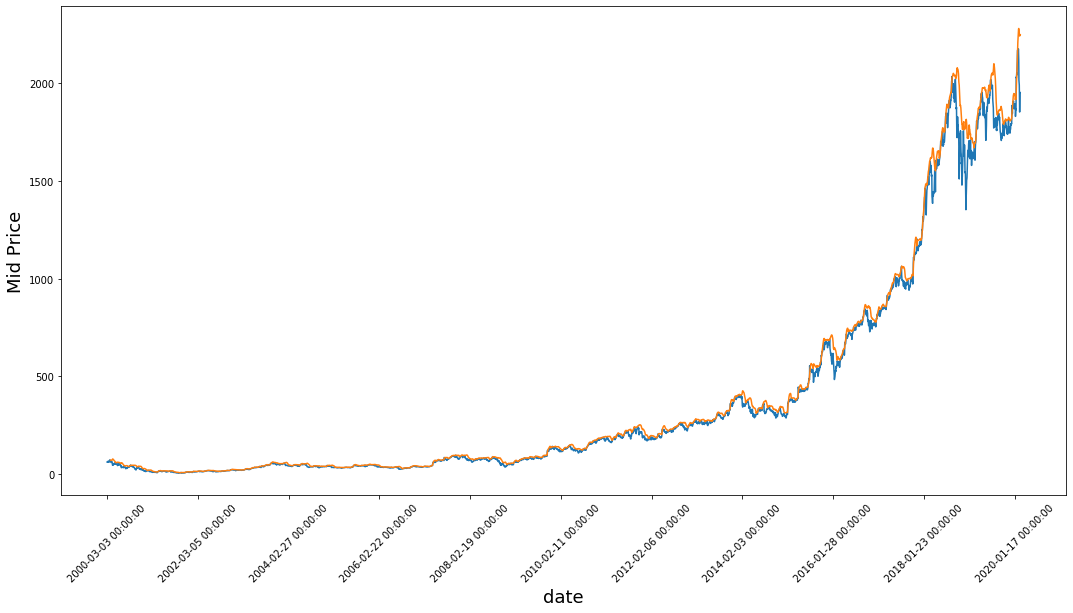

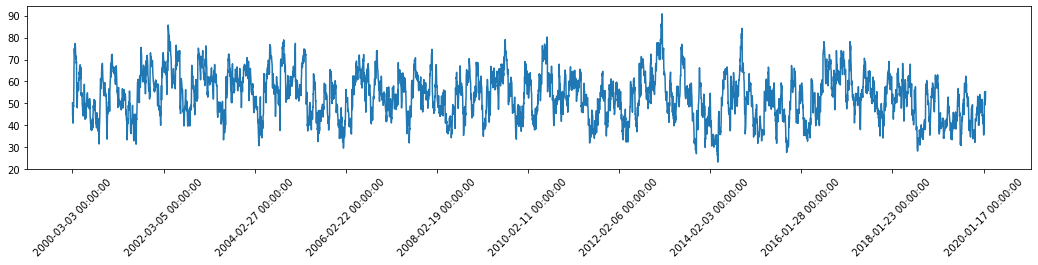

In [0]:

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0,df['bb_upper'])
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()
plt.figure(figsize = (18,3))
plt.plot(range(df.shape[0]),amzn_data['RSI'])
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.show()

In [0]:
corr = df.corr()
corr

,open,high,low,close,volume,RSI,MACD,MACD_Hist,MACD_Signal,bb_middle,bb_upper,bb_lower
open,1.000000,0.999937,0.999902,0.999838,-0.258854,0.164480,0.335232,0.011905,0.353649,0.998824,0.998238,0.998147
high,0.999937,1.000000,0.999878,0.999918,-0.257366,0.164500,0.333463,0.011360,0.351942,0.998910,0.998435,0.998108
low,0.999902,0.999878,1.000000,0.999927,-0.260778,0.167180,0.337800,0.015501,0.355201,0.998625,0.997909,0.998092
close,0.999838,0.999918,0.999927,1.000000,-0.259087,0.166791,0.335611,0.013824,0.353420,0.998752,0.998154,0.998086
volume,-0.258854,-0.257366,-0.260778,-0.259087,1.000000,-0.040841,-0.127929,-0.033992,-0.125228,-0.256786,-0.252799,-0.260883
RSI,0.164480,0.164500,0.167180,0.166791,-0.040841,1.000000,0.555138,0.315489,0.487925,0.140962,0.140455,0.141339
MACD,0.335232,0.333463,0.337800,0.335611,-0.127929,0.555138,1.000000,0.350362,0.950926,0.301329,0.296812,0.305957
MACD_Hist,0.011905,0.011360,0.015501,0.013824,-0.033992,0.315489,0.350362,1.000000,0.043362,-0.028517,-0.025651,-0.031670
MACD_Signal,0.353649,0.351942,0.355201,0.353420,-0.125228,0.487925,0.950926,0.043362,1.000000,0.330840,0.325075,0.336818
bb_middle,0.998824,0.998910,0.998625,0.998752,-0.256786,0.140962,0.301329,-0.028517,0.330840,1.000000,0.999434,0.999298


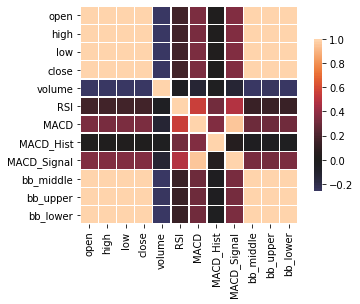

In [0]:
import seaborn as sns

ax = sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

In [0]:
# First calculate the mid prices from the highest and lowest 
high_prices = df.loc[:,'high'].as_matrix()
low_prices = df.loc[:,'low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
df['mid_prices']= mid_prices

In [0]:
df_tf = df[['mid_prices','volume']]

In [0]:
train = df_tf[:500]
test = df_tf[500:]

In [0]:
train_data = mid_prices[:2500]
test_data = mid_prices[2500:]

In [0]:
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [0]:
# Train the Scaler with training data and smooth data 
smoothing_window_size = 500
for di in range(0,1000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data 
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [0]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [0]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(2500):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

Averaging mechanisms allows us to predict (often one time step ahead) by representing the future stock price as an average of the previously observed stock prices. Doing this for more than one time step can produce quite bad results. You will look at two averaging techniques below; standard averaging and exponential moving average. You will evaluate both qualitatively (visual inspection) and quantitatively (mean squared error) the results produced by two algorithms.

Mean squared error (MSE) can be calculated by taking the mean squared error between the true value at one step ahead and the predicted value and averaging it over all the predictions.

In [0]:
# Standard Average
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):
    
    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'date']
        
    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00751


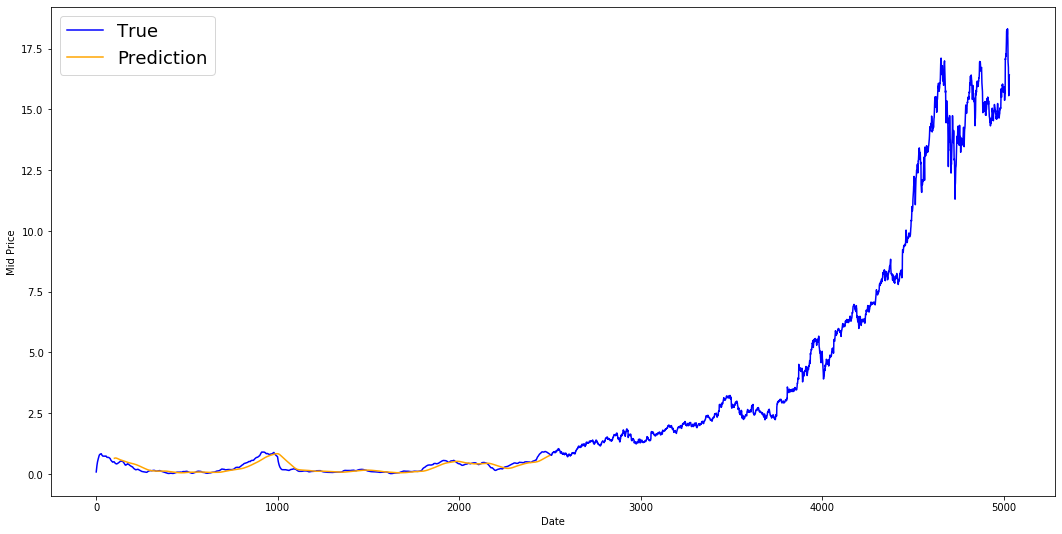

In [0]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [0]:
# Exponential Moving Average
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):
    
    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00007


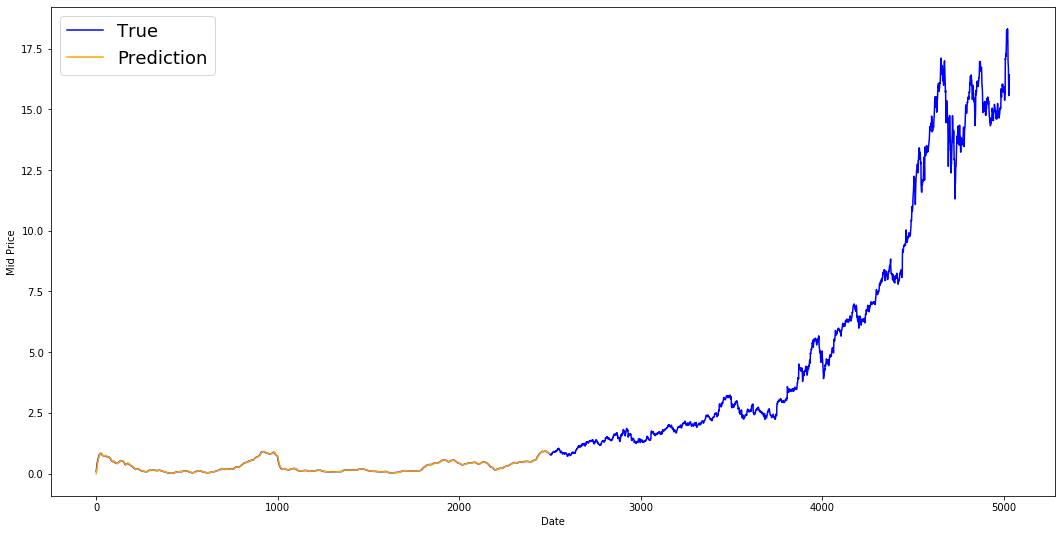

In [0]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

You see that it fits a perfect line that follows the True distribution (and justified by the very low MSE). Practically speaking, you can't do much with just the stock market value of the next day. Personally what I'd like is not the exact stock market price for the next day, but would the stock market prices go up or down in the next 30 days. Try to do this, and you will expose the incapability of EMA method.

Let us try to make predictions in windows (say you predict next 2 days window, instead of just next day). We might realize how wrong EMA can go. 

df_tf = df[['mid_prices','volume']]
train = df_tf[:2500]
test = df_tf[2500:]

In [0]:
class DataGeneratorSeq(object):
    
    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):
        
        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)
        
        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)
                
            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(1,5)]
            
            self._cursor[b] = (self._cursor[b]+1)%self._prices_length
            
        return batch_data,batch_labels
    
    def unroll_batches(self):
            
        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):
            
            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels
    
    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))
        


dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.085163   0.11642407 0.7145106  0.12334456 0.42724848]

	Output: [0.29446462 0.10055865 0.5548692  0.12214064 0.42713952]


Unrolled index 1
	Inputs:  [0.16421232 0.1117621  0.70782954 0.12214064 0.42713952]

	Output: [0.35341913 0.10317669 0.60080874 0.11611474 0.41980428]


Unrolled index 2
	Inputs:  [0.23378946 0.10672021 0.65151626 0.12066478 0.42744234]

	Output: [0.35341913 0.09804377 0.51338714 0.11909768 0.42248145]


Unrolled index 3
	Inputs:  [0.29446462 0.10317669 0.60080874 0.11909768 0.42518598]

	Output: [0.40820807 0.10055865 0.4771365  0.11325119 0.42248145]


Unrolled index 4
	Inputs:  [0.35341913 0.10055865 0.5548692  0.11760627 0.42248145]

	Output: [0.5326359  0.09283481 0.44484782 0.1114574  0.413448  ]


In [0]:
D = 1 # Dimensionality of the data. Since our data is 1-D this would be 1
num_unrollings = 30 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

In [0]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [0]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

In [0]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of 
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

In [0]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [0]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


In [0]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 30 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings) 

x_axis_seq = []

# Points you start our test predictions from
test_points_seq = np.arange(1000,5000,10).tolist() 

for ep in range(epochs):       
    
    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):
        
        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)
        
        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l
    
    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))
      
      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))
      
      train_mse_ot.append(average_loss)
            
      average_loss = 0 # reset loss
      
      predictions_seq = []
      
      mse_test_loss_seq = []
      
      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []
        
        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]
        
        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)
        
        feed_dict = {}
        
        current_price = all_mid_data[w_i-1]
        
        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)
        
        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)
        
          our_predictions.append(np.asscalar(pred))
        
          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2
        
        session.run(reset_sample_states)
        
        predictions_seq.append(np.array(our_predictions))
        
        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)
        
        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)
        
      current_test_mse = np.mean(mse_test_loss_seq)
      
      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0
      
      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')
      
      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 1.864328


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


	Test MSE: 16.31602
	Finished Predictions
Average loss at step 2: 1.022662
	Test MSE: 13.66489
	Finished Predictions
Average loss at step 3: 0.353274
	Test MSE: 10.30575
	Finished Predictions
Average loss at step 4: 0.236558
	Test MSE: 9.56184
	Finished Predictions
Average loss at step 5: 0.190241
	Test MSE: 11.09652
	Finished Predictions
Average loss at step 6: 0.159272
	Test MSE: 11.39222
	Finished Predictions
Average loss at step 7: 0.108947
	Decreasing learning rate by 0.5
	Test MSE: 10.51018
	Finished Predictions
Average loss at step 8: 0.092664
	Test MSE: 10.31300
	Finished Predictions
Average loss at step 9: 0.089563
	Test MSE: 10.48719
	Finished Predictions
Average loss at step 10: 0.090721
	Decreasing learning rate by 0.5
	Test MSE: 10.64304
	Finished Predictions
Average loss at step 11: 0.101423
	Test MSE: 10.58404
	Finished Predictions
Average loss at step 12: 0.104220
	Test MSE: 10.42283
	Finished Predictions
Average loss at step 13: 0.105108
	Decreasing learning rate by 0.

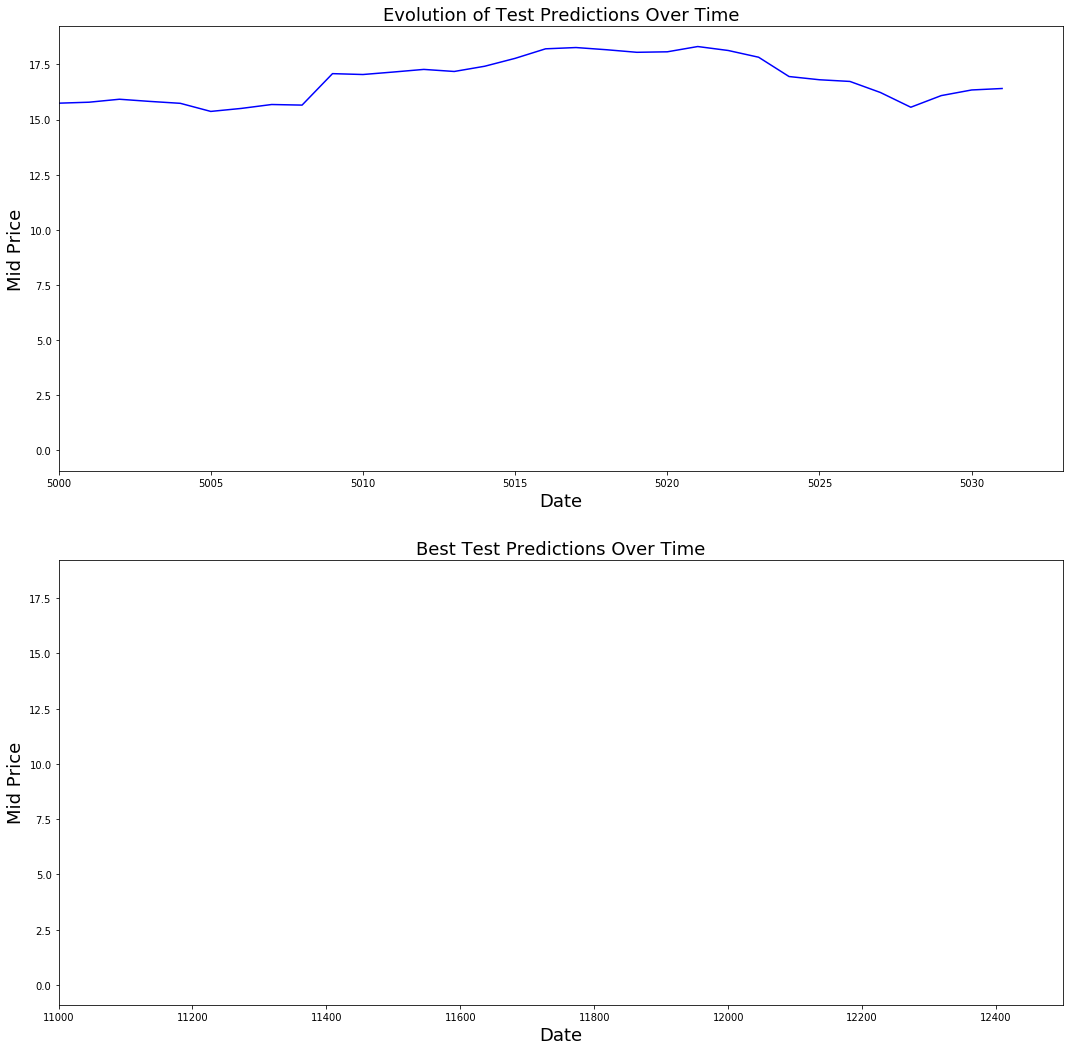

In [0]:
best_prediction_epoch = 17 

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(0,5033)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')
    
plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)
plt.show()

In [0]:
all_mid_data

array([ 0.08516301,  0.16421232,  0.23378946, ..., 16.08733848,
       16.34282912, 16.40927118])